In [34]:
import pandas as pd
import numpy as np

database = 'covtype.binary'
cv = 2
extension = f'{database}_cv_{cv}.csv'
df_nn = pd.read_csv(f'/Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/results/accuracy_time_stats/neural_network_classification_{extension}')
df_nystrom_and_ridge = pd.read_csv(f'/Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/results/accuracy_time_stats/Nystrom_and_ridge_classification_{extension}')
df_rbf_and_ridge = pd.read_csv(f'/Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/results/accuracy_time_stats/RBF_and_ridge_classification_{extension}')
file_path_for_ksvm = f'/Users/blancacanocamarero/repositorios/TFM/Kernel-methods-comparatives/Basic-measures/results/accuracy_time_stats/KSVM_classification_{database}_cv_{cv}.txt'

In [35]:
nn_accuracy = df_nn.accuracy_test.to_list()
nn_training_time = df_nn.training_time.to_list()
nn_labels = list(map(lambda x: 'NN of shape '+str(x),df_nn.hidden_layer_sizes.to_list()))
df_nn.head()

,hidden_layer_sizes,best_params,best_accuracy_cv,training_time,accuracy_test,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_mlp_classification__alpha,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,"(1200,)",{'mlp_classification__alpha': 1.0},0.703,4.331563,0.762088,[5.10951746 5.6562885 5.87545466 5.44477904 5...,[0.23399055 0.32136643 0.02016759 0.25517213 0...,[0.00349545 0.00353754 0.00356138 0.00356185 0...,[3.14712524e-05 5.85317612e-05 4.25577164e-05 ...,[1e-06 1e-05 0.0001 0.001 0.01 0.1 1.0 10.0 10...,"[{'mlp_classification__alpha': 1e-06}, {'mlp_c...",[0.708 0.71 0.708 0.714 0.714 0.702 0.72 0.7...,[0.666 0.672 0.666 0.664 0.678 0.676 0.686 0.6...,[0.687 0.691 0.687 0.689 0.696 0.689 0.703 0.6...,[0.021 0.019 0.021 0.025 0.018 0.013 0.017 0.0...,[7 4 7 5 2 5 1 3 9 9 9 9 9 9]
1,"(34, 34)",{'mlp_classification__alpha': 10.0},0.700,0.857180,0.746449,[0.68705547 0.64808452 0.70052683 0.65589094 0...,[0.06274641 0.04309762 0.0113622 0.02474904 0...,[0.00073767 0.00064099 0.00063753 0.00075305 0...,[1.85966492e-05 1.99079514e-05 5.53131104e-05 ...,[1e-06 1e-05 0.0001 0.001 0.01 0.1 1.0 10.0 10...,"[{'mlp_classification__alpha': 1e-06}, {'mlp_c...",[0.696 0.716 0.706 0.684 0.702 0.688 0.706 0.7...,[0.68 0.682 0.678 0.65 0.662 0.674 0.652 0.6...,[0.688 0.699 0.692 0.667 0.682 0.681 0.679 0.7...,[0.008 0.017 0.014 0.017 0.02 0.007 0.027 0.0...,[4 2 3 8 5 6 7 1 9 9 9 9 9 9]
2,"(10, 10, 10)",{'mlp_classification__alpha': 10.0},0.699,0.270555,0.741136,[0.89404571 0.8706485 0.95085156 0.84943283 0...,[0.00852954 0.04479349 0.21436346 0.118137 0...,[0.00052845 0.00073957 0.00055635 0.00053203 0...,[1.54972076e-06 1.61409378e-04 7.51018524e-06 ...,[1e-06 1e-05 0.0001 0.001 0.01 0.1 1.0 10.0 10...,"[{'mlp_classification__alpha': 1e-06}, {'mlp_c...",[0.704 0.69 0.718 0.684 0.668 0.696 0.708 0.7...,[0.674 0.644 0.64 0.654 0.684 0.672 0.654 0.6...,[0.689 0.667 0.679 0.669 0.676 0.684 0.681 0.6...,[0.015 0.023 0.039 0.015 0.008 0.012 0.027 0.0...,[2 8 5 7 6 3 4 1 9 9 9 9 9 9]


In [36]:
nn_accuracy,nn_training_time,nn_labels

([0.7620880760051404, 0.7464487332476593, 0.7411361758766294],
 [4.3315629959106445, 0.8571798801422119, 0.270554780960083],
 ['NN of shape (1200,)', 'NN of shape (34, 34)', 'NN of shape (10, 10, 10)'])

In [37]:
df_nystrom_and_ridge

,n_components,best_params,best_accuracy_cv,training_time,accuracy_test,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_nystroem__gamma,param_ridge_classification__alpha,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,10,"{'nystroem__gamma': 0.0023148148148148147, 'ri...",0.648,0.005418,0.616079,[0.00459063 0.00456583 0.00437701 0.00544894 0...,[1.02400780e-04 1.03116035e-04 1.51991844e-04 ...,[0.00069499 0.00069821 0.00067151 0.00075603 0...,[1.59740448e-05 3.30209732e-05 6.31809235e-06 ...,[1.808449074074074e-05 1.808449074074074e-05 1...,[0.0001 0.0031622776601683794 0.1 3.1622776601...,"[{'nystroem__gamma': 1.808449074074074e-05, 'r...",[0.498 0.62 0.574 0.526 0.526 0.564 0.608 0.5...,[0.572 0.602 0.554 0.528 0.528 0.618 0.616 0.5...,[0.535 0.611 0.564 0.527 0.527 0.591 0.612 0.5...,[0.037 0.009 0.01 0.001 0.001 0.027 0.004 0.0...,[20 8 12 21 21 11 7 14 19 21 10 6 1 2 21 ...
1,20,"{'nystroem__gamma': 1.808449074074074e-05, 'ri...",0.696,0.012008,0.664701,[0.01567256 0.00350344 0.00214458 0.00177562 0...,[9.40263271e-03 1.78456306e-04 3.31640244e-04 ...,[0.00157642 0.00073361 0.00064838 0.0006305 0...,[8.60452652e-04 5.14984131e-05 2.03847885e-05 ...,[1.808449074074074e-05 1.808449074074074e-05 1...,[0.0001 0.0031622776601683794 0.1 3.1622776601...,"[{'nystroem__gamma': 1.808449074074074e-05, 'r...",[0.686 0.622 0.604 0.526 0.526 0.68 0.664 0.6...,[0.706 0.618 0.596 0.528 0.528 0.604 0.612 0.6...,[0.696 0.62 0.6 0.527 0.527 0.642 0.638 0.6...,[0.01 0.002 0.004 0.001 0.001 0.038 0.026 0.0...,[ 1 13 14 22 22 8 9 4 19 22 6 11 9 12 22 ...
2,50,"{'nystroem__gamma': 0.0023148148148148147, 'ri...",0.718,0.183285,0.675343,[0.00463057 0.0031625 0.00240552 0.00460708 0...,[2.16341019e-03 9.21368599e-04 5.44786453e-05 ...,[0.00163412 0.000808 0.00081003 0.00153685 0...,[8.25166702e-04 2.21729279e-05 1.19209290e-07 ...,[1.808449074074074e-05 1.808449074074074e-05 1...,[0.0001 0.0031622776601683794 0.1 3.1622776601...,"[{'nystroem__gamma': 1.808449074074074e-05, 'r...",[0.692 0.73 0.652 0.526 0.526 0.73 0.686 0.6...,[0.716 0.668 0.64 0.528 0.528 0.702 0.664 0.6...,[0.704 0.699 0.646 0.527 0.527 0.716 0.675 0.6...,[0.012 0.031 0.006 0.001 0.001 0.014 0.011 0.0...,[ 5 7 14 22 22 2 11 12 20 22 10 1 6 13 22 ...
3,100,"{'nystroem__gamma': 0.00020460265659332975, 'r...",0.729,0.771668,0.741446,[0.01008797 0.01071692 0.01142299 0.01040065 0...,[5.66959381e-04 4.31537628e-05 3.21030617e-04 ...,[0.00163114 0.00122559 0.00271618 0.00120652 0...,[3.12924385e-04 3.15904617e-05 1.48403645e-03 ...,[1.808449074074074e-05 1.808449074074074e-05 1...,[0.0001 0.0031622776601683794 0.1 3.1622776601...,"[{'nystroem__gamma': 1.808449074074074e-05, 'r...",[0.728 0.714 0.666 0.526 0.526 0.724 0.726 0.6...,[0.716 0.698 0.666 0.528 0.528 0.734 0.716 0.6...,[0.722 0.706 0.666 0.527 0.527 0.729 0.721 0.6...,[0.006 0.008 0. 0.001 0.001 0.005 0.005 0.0...,[ 3 8 14 22 22 1 4 12 20 22 5 2 6 13 22 ...
4,200,"{'nystroem__gamma': 0.0023148148148148147, 'ri...",0.740,0.833420,0.748491,[0.01686347 0.01769948 0.0185324 0.01462448 0...,[1.71542168e-04 1.59502029e-04 7.15553761e-03 ...,[0.00228596 0.00279605 0.00503707 0.00237298 0...,[1.78813934e-05 5.36084175e-04 2.78401375e-03 ...,[1.808449074074074e-05 1.808449074074074e-05 1...,[0.0001 0.0031622776601683794 0.1 3.1622776601...,"[{'nystroem__gamma': 1.808449074074074e-05, 'r...",[0.728 0.718 0.654 0.526 0.526 0.744 0.728 0.6...,[0.718 0.698 0.664 0.528 0.528 0.73 0.718 0.6...,[0.723 0.708 0.659 0.527 0.527 0.737 0.723 0.6...,[0.005 0.01 0.005 0.001 0.001 0.007 0.005 0.0...,[ 6 10 16 22 22 2 6 12 20 22 9 1 4 13 22 ...
5,500,"{'nystroem__gamma': 0.00020460265659332975, 'r...",0.740,0.899240,0.750832,[0.11512196 0.17949986 0.12029243 0.11187255 0...,[4.92298603e-03 9.10997391e-03 3.33826542e-02 ...,[0.04770052 0.01025367 0.0368495 0.01150346 0...,[3.90154123e-02 3.55482101e-04 2.53615379e-02 ...,[1.808449074074074e-05 1.808449074074074e-05 1...,[0.0001 0.003162277660

In [38]:
df_rbf_and_ridge

,n_components,best_params,best_accuracy_cv,training_time,accuracy_test,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_rbf_sampler__gamma,param_ridge_classification__alpha,params,split0_test_score,split1_test_score,mean_test_score,std_test_score,rank_test_score
0,10,"{'rbf_sampler__gamma': 0.00020460265659332975,...",0.629,0.002699,0.572540,[0.00185466 0.00224638 0.00190604 0.0017339 0...,[2.74181366e-05 2.76565552e-05 3.77893448e-05 ...,[0.00045335 0.00055969 0.00045645 0.00041938 0...,[3.45706940e-06 1.37090683e-05 1.34706497e-05 ...,['scale' 'scale' 'scale' 'scale' 'scale' 1.808...,[0.0001 0.0031622776601683794 0.1 3.1622776601...,"[{'rbf_sampler__gamma': 'scale', 'ridge_classi...",[0.636 0.61 0.562 0.594 0.572 0.57 0.592 0.5...,[0.586 0.56 0.526 0.564 0.578 0.66 0.662 0.6...,[0.611 0.585 0.544 0.579 0.575 0.615 0.627 0.5...,[0.025 0.025 0.018 0.015 0.003 0.045 0.035 0.0...,[ 7 14 24 16 18 6 2 12 28 29 3 5 8 1 29 ...
1,20,"{'rbf_sampler__gamma': 0.0023148148148148147, ...",0.662,0.004626,0.644913,[0.004632 0.00445998 0.00251997 0.00408649 0...,[2.03132629e-04 8.80956650e-05 9.37104225e-04 ...,[0.00129187 0.0014286 0.00049305 0.00126171 0...,[8.34465027e-07 5.84125519e-05 1.78813934e-05 ...,['scale' 'scale' 'scale' 'scale' 'scale' 1.808...,[0.0001 0.0031622776601683794 0.1 3.1622776601...,"[{'rbf_sampler__gamma': 'scale', 'ridge_classi...",[0.604 0.638 0.688 0.636 0.63 0.612 0.65 0.6...,[0.61 0.61 0.626 0.636 0.626 0.596 0.59 0.6...,[0.607 0.624 0.657 0.636 0.628 0.604 0.62 0.6...,[0.003 0.014 0.031 0. 0.002 0.008 0.03 0.0...,[18 12 3 7 10 20 13 8 28 29 14 10 4 21 29 ...
2,50,"{'rbf_sampler__gamma': 1.808449074074074e-05, ...",0.711,0.023113,0.717046,[0.00710344 0.00630903 0.00353944 0.00227797 0...,[1.40357018e-03 4.91142273e-05 1.72269344e-03 ...,[0.00126708 0.00131142 0.00124145 0.00067294 0...,[5.86152077e-04 4.78386879e-04 5.95331192e-04 ...,['scale' 'scale' 'scale' 'scale' 'scale' 1.808...,[0.0001 0.0031622776601683794 0.1 3.1622776601...,"[{'rbf_sampler__gamma': 'scale', 'ridge_classi...",[0.694 0.648 0.7 0.652 0.61 0.696 0.674 0.6...,[0.692 0.64 0.686 0.656 0.598 0.726 0.684 0.6...,[0.693 0.644 0.693 0.654 0.604 0.711 0.679 0.6...,[0.001 0.004 0.007 0.002 0.006 0.015 0.005 0.0...,[ 6 14 5 12 21 1 8 11 28 28 3 4 7 19 28 ...
3,100,"{'rbf_sampler__gamma': 1.808449074074074e-05, ...",0.729,0.048542,0.739834,[0.00489092 0.00586903 0.00470507 0.00460613 0...,[1.71899796e-04 1.57916546e-03 2.41315365e-03 ...,[0.00097108 0.00101388 0.00100088 0.00102842 0...,[3.81469727e-06 5.49554825e-05 5.60283661e-05 ...,['scale' 'scale' 'scale' 'scale' 'scale' 1.808...,[0.0001 0.0031622776601683794 0.1 3.1622776601...,"[{'rbf_sampler__gamma': 'scale', 'ridge_classi...",[0.682 0.686 0.68 0.67 0.626 0.712 0.662 0.6...,[0.678 0.694 0.672 0.646 0.64 0.746 0.696 0.6...,[0.68 0.69 0.676 0.658 0.633 0.729 0.679 0.6...,[0.002 0.004 0.004 0.012 0.007 0.017 0.017 0.0...,[ 8 6 10 16 20 1 9 17 28 28 3 3 14 19 28 ...
4,200,"{'rbf_sampler__gamma': 1.808449074074074e-05, ...",0.727,0.063027,0.739880,[0.00777662 0.00442827 0.00409639 0.00409794 0...,[3.40139866e-03 3.57627869e-07 7.76052475e-05 ...,[0.00171947 0.00170553 0.0016017 0.00167155 0...,[1.04904175e-05 2.34842300e-05 5.48362732e-06 ...,['scale' 'scale' 'scale' 'scale' 'scale' 1.808...,[0.0001 0.0031622776601683794 0.1 3.1622776601...,"[{'rbf_sampler__gamma': 'scale', 'ridge_classi...",[0.7 0.696 0.716 0.668 0.624 0.712 0.684 0.6...,[0.7 0.68 0.708 0.686 0.654 0.742 0.68 0.6...,[0.7 0.688 0.712 0.677 0.639 0.727 0.682 0.6...,[0. 0.008 0.004 0.009 0.015 0.015 0.002 0.0...,[ 7 9 5 13 20 1 11 17 28 28 3 2 10 19 28 ...
5,500,"{'rbf_sampler__gamma': 1.808449074074074e-05, ...",0.727,0.099451,0.741142,[0.02115357 0.01958549 0.01534414 0.01474702 0...,[3.16655636e-03 2.09152699e-03 1.45983696e-03 ...,[0.00437748 0.00608468 0.00355196 0.00364411 0...,[8.38398933e-04 2.49457359e-03 4.29153442e-05 ...,['scale' 'scale' 'scale' 'scale' 'scale' 1.808...,[0.0001 0.0031622776601683794 0.1 3.16

In [39]:
from utils import extract_parameters
best_params, training_time, test_accuracy = extract_parameters(file_path_for_ksvm)
print( f'KSVM result for {database}')
print("Best Parameters:", best_params)
print("Training Time:", training_time)
print("Accuracy in Test:", test_accuracy)
print('')

nn_accuracy.append(test_accuracy)
nn_training_time.append(training_time)
nn_labels.append('KSVM')

KSVM result for covtype.binary
Best Parameters:  {'svm__C': 10000.0, 'svm__gamma': 0.00020460265659332975}
Training Time:  0.05521273612976074
Accuracy in Test:  0.7585253350468147



In [40]:
from plotting import plot_comparatives

# Time analysis adults data set

Conclusion: Radom features win. 

Use Wilcolxon .

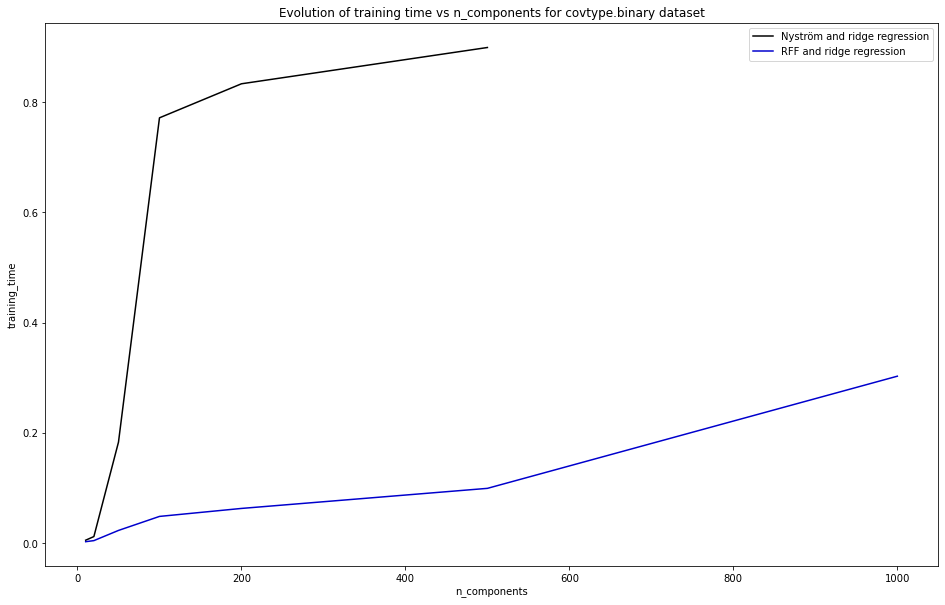

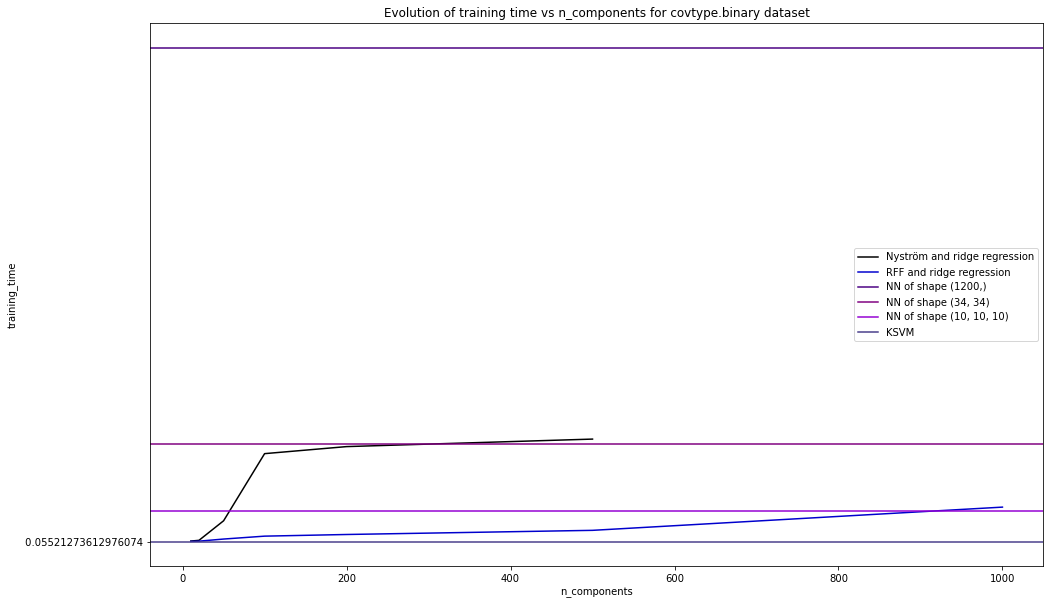

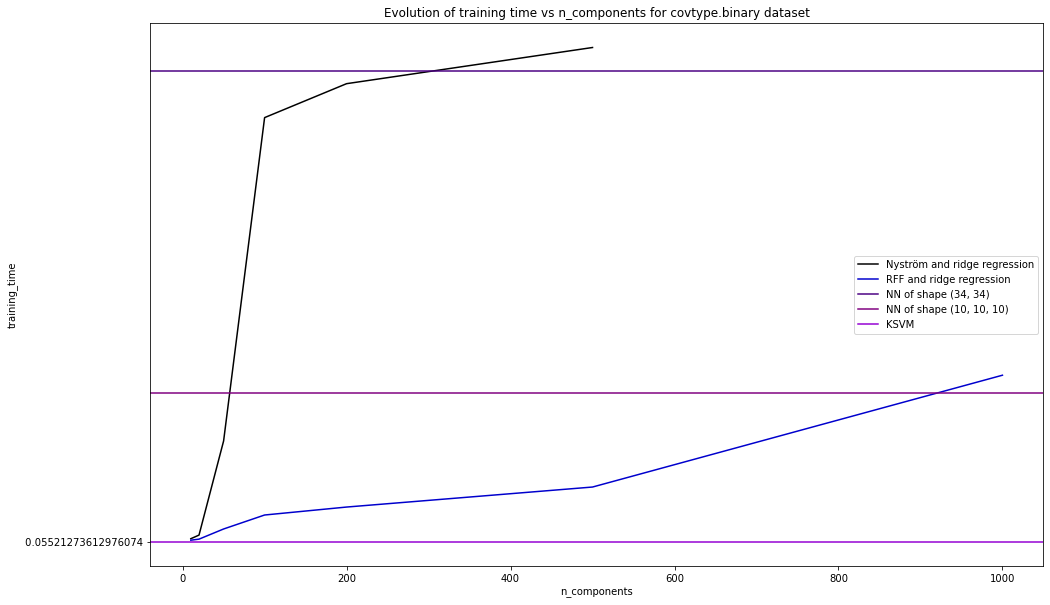

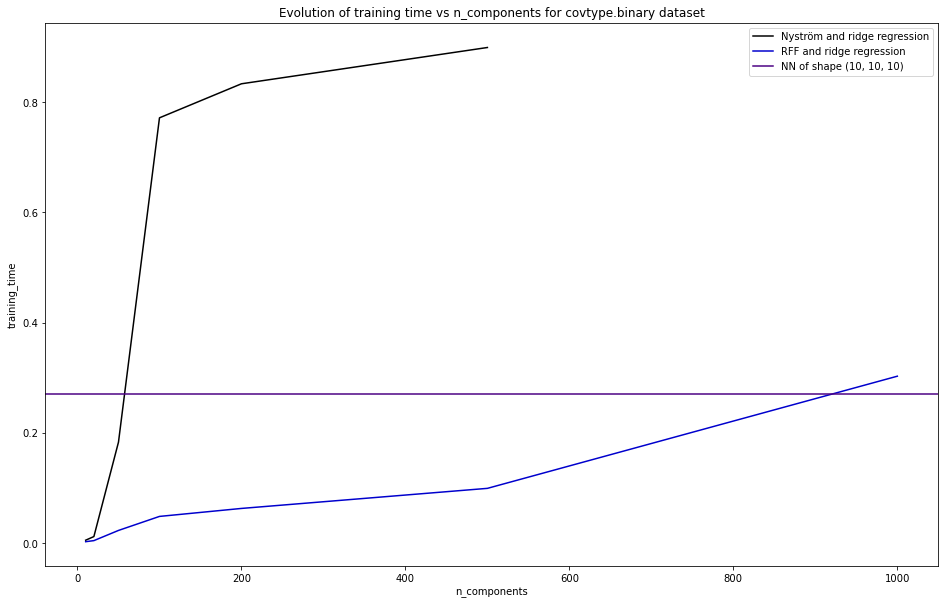

In [41]:

column = 'training_time'
df_with_n_components = [df_nystrom_and_ridge, df_rbf_and_ridge]
df_labels = ['Nyström and ridge regression', 'RFF and ridge regression']
title = f'Evolution of training time vs n_components for {database} dataset'

plot_comparatives(column=column, df_with_n_components=df_with_n_components, df_labels=df_labels, title=title)
plot_comparatives(column, df_with_n_components, df_labels, title, nn_training_time, nn_labels, False)
plot_comparatives(column, df_with_n_components, df_labels, title, nn_training_time[1:], nn_labels[1:], False)
plot_comparatives(column, df_with_n_components, df_labels, title, nn_training_time[2:-1], nn_labels[2:-1], False)

# TODO separate
# rm nn and add svc linear
# ksvm 
# rr Nystrom + rfb linear 
# usar intelet

# Accuracy 

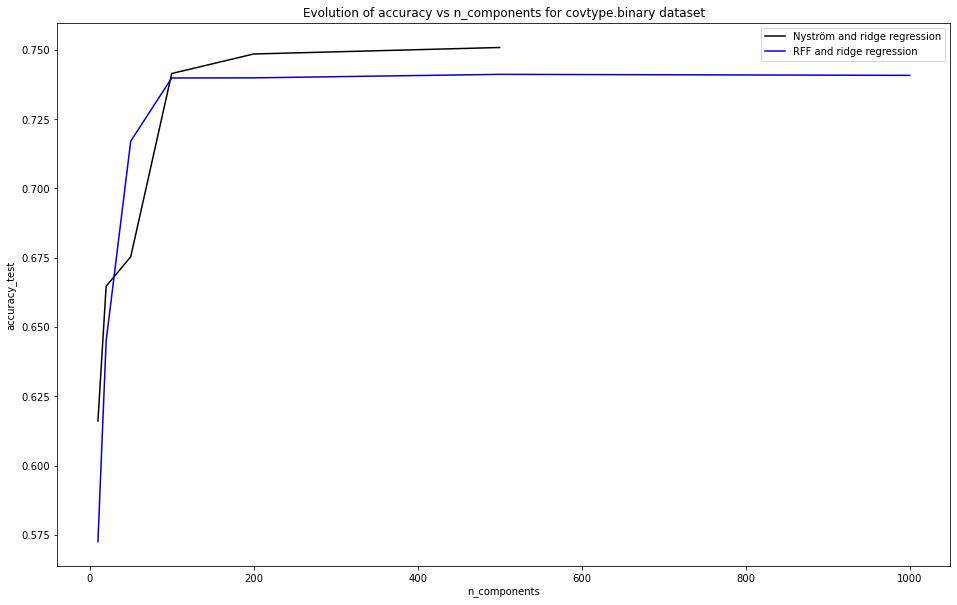

TypeError: '<' not supported between instances of 'str' and 'float'

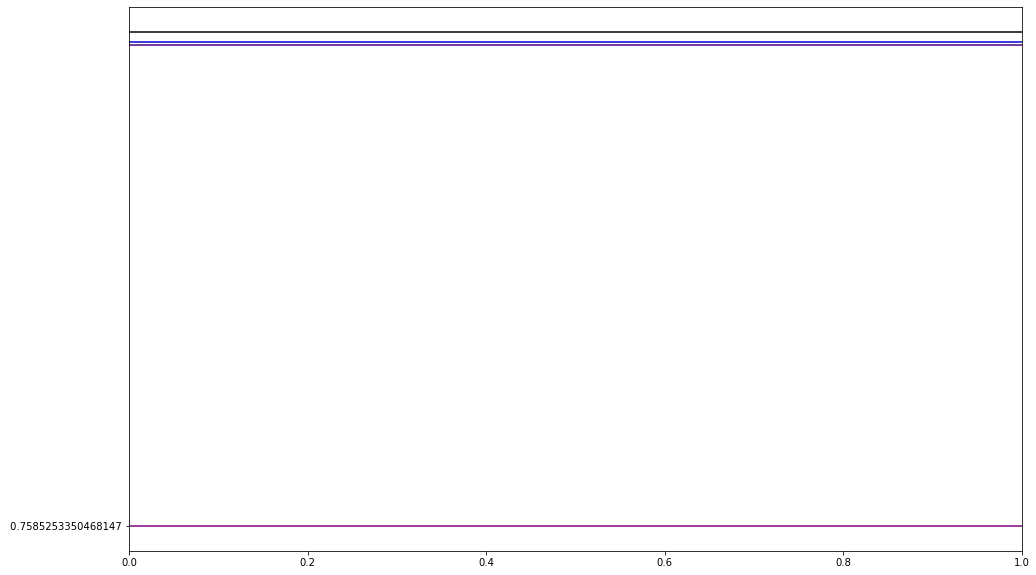

In [42]:
column = 'accuracy_test'

df_labels = ['Nyström and ridge regression', 'RFF and ridge regression']
title = f'Evolution of accuracy vs n_components for {database} dataset'
constant_data = nn_accuracy
plot_comparatives(column=column, df_with_n_components=df_with_n_components, df_labels=df_labels, title=title)
plot_comparatives(column, [],[], title, constant_data, nn_labels, False)
plot_comparatives(column, df_with_n_components, df_labels, title, constant_data, nn_labels, False)
plot_comparatives(column, df_with_n_components, df_labels, title, constant_data[1:], nn_labels[1:], False)
plot_comparatives(column, df_with_n_components, df_labels, title, constant_data[2:-1], nn_labels[2:-1], False)


# Damping


Formula: 

$$damping = \frac{accuracy}{time} \times 100$$

The bigger the best

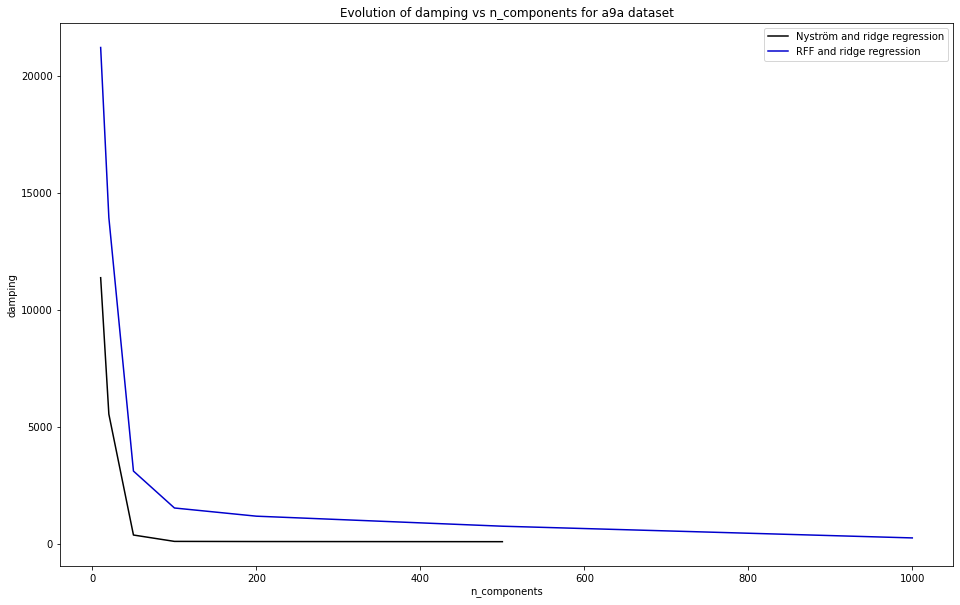

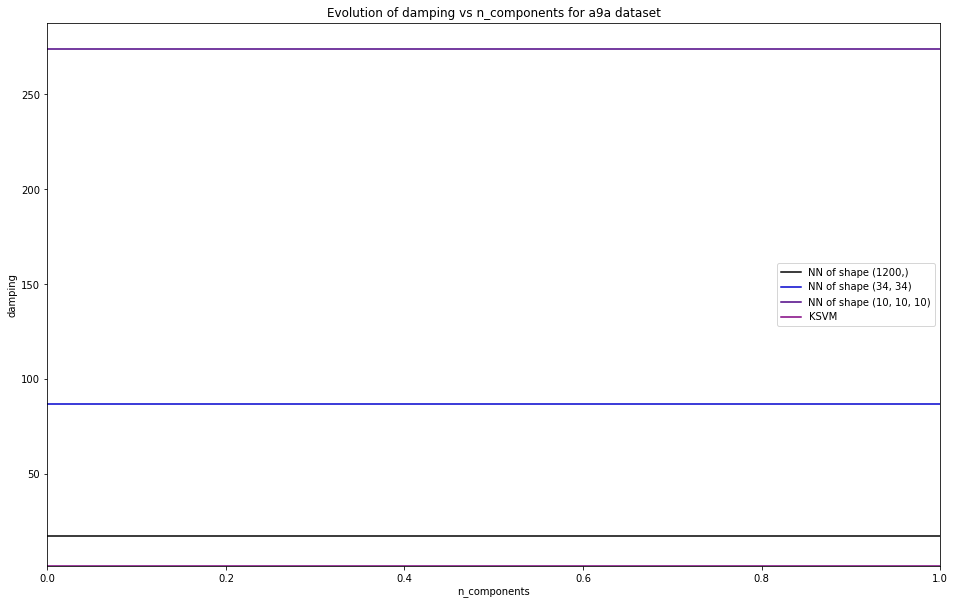

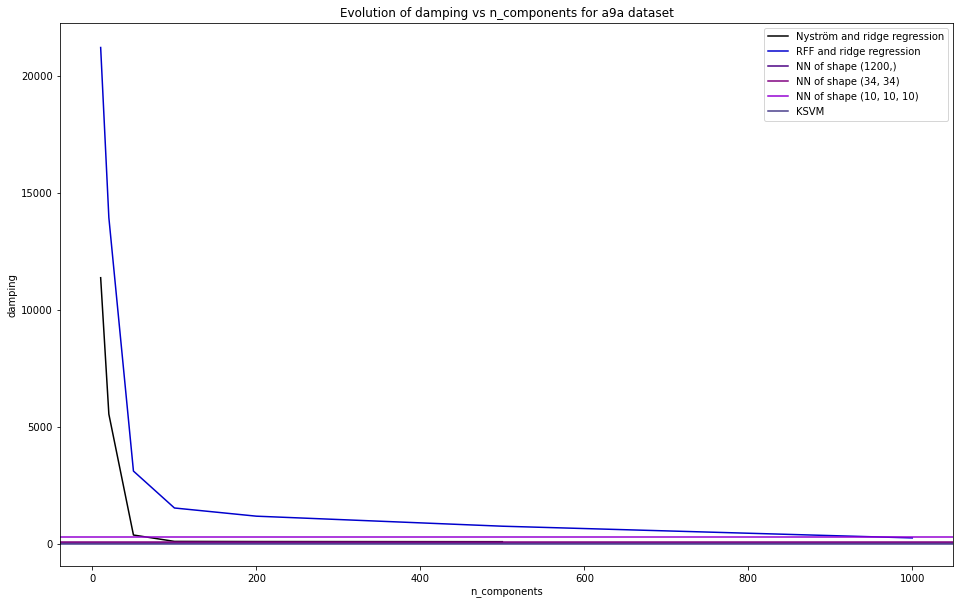

In [ ]:
# Computing damping
constant_damping = [acc / time*100 for acc,time in zip(nn_accuracy, nn_training_time)]
damping_column = 'damping'
for df in df_with_n_components:
    df['damping'] = df.accuracy_test / df.training_time * 100

# Plotting

column = damping_column
title = f'Evolution of damping vs n_components for {database} dataset'
constant_data = constant_damping
plot_comparatives(column=column, df_with_n_components=df_with_n_components, df_labels=df_labels, title=title)
plot_comparatives(column, [],[], title, constant_data, nn_labels, False, constant_margin=0.05)
plot_comparatives(column, df_with_n_components, df_labels, title, constant_data, nn_labels, False)